# Ex 5. 
Train a Linear Regression model, an MLP Regressor with 2 hidden layers of 10 \
neurons each and no activation functions, and another MLP Regressor with 2 hidden \
layers of 10 neurons each using ReLU activation functions. (Use `random_state=0` on the \
MLPs, regardless of the run). Plot a boxplot of the test MAE of each model.

> average the performance of the models over 10 separate runs. In each \
> run, use a different 80-20 train-test split by setting a random_state=i, with i=1..10.

In [ ]:
# Code for ex5

# Ex 6.
Compare a Linear Regression with a MLP with no activations, and explain the impact \
and the importance of using activation functions in a MLP. Support your reasoning with the \
results from the boxplots.

> Refer to the report for the explanation

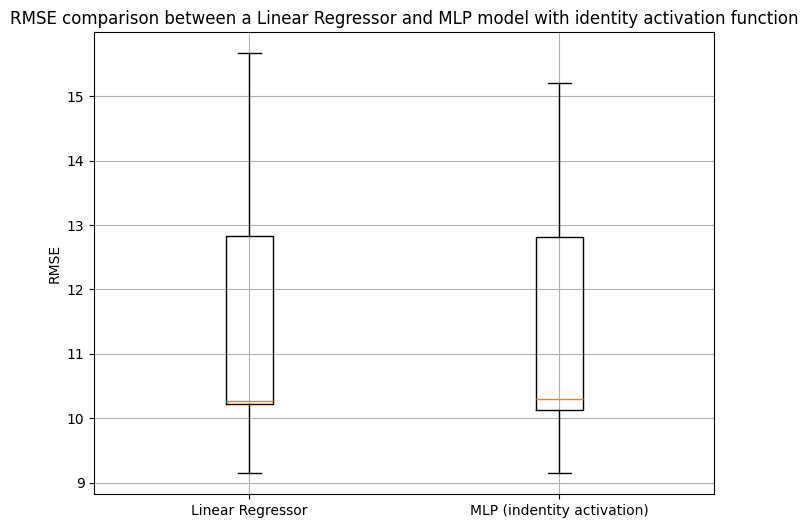

In [13]:
# Code for ex6
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Create dataframe from parkinsons.csv
df = pd.read_csv('./parkinsons.csv', sep=',')

X = df.drop('target', axis=1) # Input variables
y = df['target'] # Target variable

# Create both models
lin_reg = LinearRegression()
mlp = MLPRegressor(activation='identity', random_state=0)

# Evaluate performance with 5-fold cross validation
lin_reg_scores = cross_val_score(lin_reg, X, y, cv=5, scoring='neg_root_mean_squared_error')
mlp_scores = cross_val_score(mlp, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Boxplots
plt.figure(figsize=(8, 6))
plt.boxplot([lin_reg_scores * -1, mlp_scores * -1], tick_labels=['Linear Regressor', 'MLP (indentity activation)'])
plt.ylabel('RMSE')
plt.title('RMSE comparison between a Linear Regressor and MLP model with identity activation function')
plt.grid(True)
plt.show()

# Ex 7.
Using a 80-20 train-test split with `random_state=0`, use a Grid Search to tune the \
hyperparameters of an MLP regressor with two hidden layers (size 10 each). The \
parameters to search over are: (i) L2 penalty, with the values $\{0.0001, 0.001, 0.01\}$; (ii) \
learning rate, with the values $\{0.001, 0.01, 0.1\}$; and (iii) batch size, with the values \
$\{32, 64, 128\}$. Plot the test MAE for each combination of hyperparameters, report the \
best combination, and discuss the trade-offs between the combinations.

> Refer to the report for the explanation

In [ ]:
# Code for ex7